# Sınıflandırma ile Boy, Kilo ve Yaşa Göre Cinsiyet Tahmini

In [5]:
#1. Kutuphaneler
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

#2. Veri Onisleme
#2.1 Veri Yukleme
veriler = pd.read_csv('veriler.csv')
print(veriler)

   ulke  boy  kilo  yas cinsiyet
0    tr  130    30   10        e
1    tr  125    36   11        e
2    tr  135    34   10        k
3    tr  133    30    9        k
4    tr  129    38   12        e
5    tr  180    90   30        e
6    tr  190    80   25        e
7    tr  175    90   35        e
8    tr  177    60   22        k
9    us  185   105   33        e
10   us  165    55   27        k
11   us  155    50   44        k
12   us  160    58   39        k
13   us  162    59   41        k
14   us  167    62   55        k
15   fr  174    70   47        e
16   fr  193    90   23        e
17   fr  187    80   27        e
18   fr  183    88   28        e
19   fr  159    40   29        k
20   fr  164    66   32        k
21   fr  166    56   42        k


# Independent Variables

In [6]:
x = veriler.iloc[:,1:4].values # bağımsız değişkenler -> Boy, Kilo, Yas
print(x)

[[130  30  10]
 [125  36  11]
 [135  34  10]
 [133  30   9]
 [129  38  12]
 [180  90  30]
 [190  80  25]
 [175  90  35]
 [177  60  22]
 [185 105  33]
 [165  55  27]
 [155  50  44]
 [160  58  39]
 [162  59  41]
 [167  62  55]
 [174  70  47]
 [193  90  23]
 [187  80  27]
 [183  88  28]
 [159  40  29]
 [164  66  32]
 [166  56  42]]


# Dependent Variables

In [7]:
y = veriler.iloc[:,4:].values # bağımlı değişkenler -> Cinsiyet
print(y)

[['e']
 ['e']
 ['k']
 ['k']
 ['e']
 ['e']
 ['e']
 ['e']
 ['k']
 ['e']
 ['k']
 ['k']
 ['k']
 ['k']
 ['k']
 ['e']
 ['e']
 ['e']
 ['e']
 ['k']
 ['k']
 ['k']]


In [11]:
# Kız ve Erkek Sayısı
# y: 2D numpy array -> önce 1D hale getir
y_flat = y.ravel()

# Pandas serisine dönüştür ve say
counts = pd.Series(y_flat).value_counts()

print(f"Cinsiyet dağılımı:\n{counts}")

Cinsiyet dağılımı:
e    11
k    11
Name: count, dtype: int64


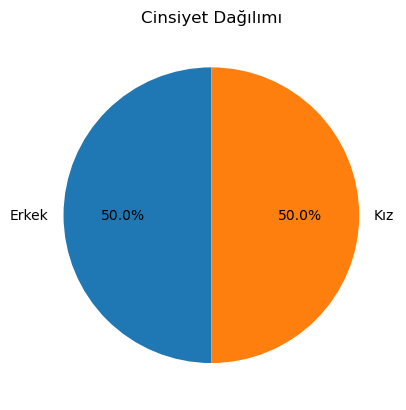

In [12]:
counts.plot(kind='pie', labels=['Erkek', 'Kız'], autopct='%1.1f%%', startangle=90)
plt.title("Cinsiyet Dağılımı")
plt.ylabel("")  # Y ekseni etiketi gizlensin
plt.show()

# Train/Test Split

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33, random_state=0) 
# X: [BOY KİLO YAŞ]
# Y: Cinsiyet, e:erkek k:kadın 
print(f"X Train\n{x_train}")
print(f"X Test\n{x_test}")
print(f"Y Train\n{y_train}")
print(f"Y Test\n{y_test}")

X Train
[[177  60  22]
 [190  80  25]
 [193  90  23]
 [129  38  12]
 [135  34  10]
 [180  90  30]
 [187  80  27]
 [185 105  33]
 [175  90  35]
 [183  88  28]
 [133  30   9]
 [130  30  10]
 [174  70  47]
 [160  58  39]]
X Test
[[164  66  32]
 [165  55  27]
 [167  62  55]
 [162  59  41]
 [125  36  11]
 [166  56  42]
 [155  50  44]
 [159  40  29]]
Y Train
[['k']
 ['e']
 ['e']
 ['e']
 ['k']
 ['e']
 ['e']
 ['e']
 ['e']
 ['e']
 ['k']
 ['e']
 ['e']
 ['k']]
Y Test
[['k']
 ['k']
 ['k']
 ['k']
 ['e']
 ['k']
 ['k']
 ['k']]


In [18]:
y_flat_train = y_train.ravel()

# Pandas serisine dönüştür ve say
counts_train = pd.Series(y_flat_train).value_counts()

print(f"Eğitim Verisi Cinsiyet Dağılımı:\n{counts_train}")

Eğitim Verisi Cinsiyet Dağılımı:
e    10
k     4
Name: count, dtype: int64


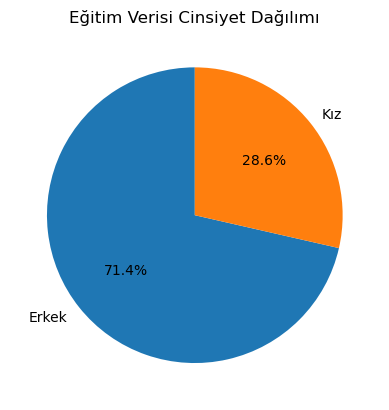

In [19]:
counts_train.plot(kind='pie', labels=['Erkek', 'Kız'], autopct='%1.1f%%', startangle=90)
plt.title("Eğitim Verisi Cinsiyet Dağılımı")
plt.ylabel("")  # Y ekseni etiketi gizlensin
plt.show()

# Feature Scaling

In [20]:
"""
Verilerin Olceklenmesi (Feature Scaling)
    - Farkli olceklerdeki degiskenleri ayni araliga getirerek modelin daha dengeli ve dogru ogrenmesini saglayan bir on isleme adimidir.
fit_transform() metodu, x_train verisi uzerinde once fit (ogrenme) islemi yapar, ardindan transform (olcekleme) islemini uygular.
"""
from sklearn.preprocessing import StandardScaler 

sc = StandardScaler() #Ortalama (mean) degeri 0, standart sapması 1 olacak sekilde olcekleme yapar.

X_train = sc.fit_transform(x_train)
X_test = sc.fit_transform(x_test)
# X_test = sc.transform(x_test)
print(f"X Train\n{X_train}")
print(f"X Test\n{X_test}")

X Train
[[ 0.45049444 -0.29657884 -0.26680787]
 [ 1.00824945  0.5096549   0.        ]
 [ 1.13696215  0.91277178 -0.17787191]
 [-1.6089087  -1.18343596 -1.15616745]
 [-1.35148331 -1.34468271 -1.33403936]
 [ 0.57920713  0.91277178  0.44467979]
 [ 0.87953676  0.5096549   0.17787191]
 [ 0.79372829  1.51744708  0.71148766]
 [ 0.36468597  0.91277178  0.88935957]
 [ 0.70791983  0.8321484   0.26680787]
 [-1.43729177 -1.50592946 -1.42297532]
 [-1.56600447 -1.50592946 -1.33403936]
 [ 0.32178174  0.10653803  1.95659106]
 [-0.27887751 -0.37720222  1.2451034 ]]
X Test
[[ 0.47240026  1.32853794 -0.24991255]
 [ 0.54952683  0.20439045 -0.64977262]
 [ 0.70377998  0.91975703  1.58944379]
 [ 0.31814711  0.61317136  0.46983559]
 [-2.53553608 -1.73731884 -1.92932485]
 [ 0.6266534   0.30658568  0.5498076 ]
 [-0.2217389  -0.30658568  0.70975163]
 [ 0.08676739 -1.32853794 -0.48982859]]


# Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(random_state=0)
logr.fit(X_train,y_train.ravel())

y_pred = logr.predict(X_test)
print(f"X Test Değerleri\n {x_test}")
print(f"Y Tahmin Değerleri\n {y_pred}")
print(f"Y Test Değerleri\n {y_test}")

X Test Değerleri
 [[164  66  32]
 [165  55  27]
 [167  62  55]
 [162  59  41]
 [125  36  11]
 [166  56  42]
 [155  50  44]
 [159  40  29]]
Y Tahmin Değerleri
 ['e' 'e' 'e' 'e' 'k' 'e' 'e' 'k']
Y Test Değerleri
 [['k']
 ['k']
 ['k']
 ['k']
 ['e']
 ['k']
 ['k']
 ['k']]


# Confusion Matrix

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[0 1]
 [6 1]]


# KNN

In [23]:
from sklearn.neighbors import KNeighborsClassifier
#knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski')
knn = KNeighborsClassifier(n_neighbors=1, metric='minkowski')
knn.fit(X_train,y_train.ravel())
# DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

y_pred = knn.predict(X_test)
cmKnn = confusion_matrix(y_test,y_pred)
print(cmKnn)

[[1 0]
 [4 3]]


# Support Vector Classification

In [24]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# SVC
# RBF bir kernel fonksiyonu olduğu için, bu doğrudan "kernel trick" kullanımıdır.
# Yani bu kod, veriyi yüksek boyutlu bir uzaya taşıyıp orada doğrusal bir ayırıcı düzlem bulmaya çalışır.
svc = SVC(kernel='rbf') # kernel: 'linear', 'poly', 'rbf', 'sigmoid'
svc.fit(X_train,y_train.ravel())
y_pred = svc.predict(X_test)
# Confusion Matrix
cmSVC = confusion_matrix(y_test,y_pred)
print(f'Normal (non-weighted) SVM\n {cmSVC}')

# Weighted SVC Model
model = SVC(kernel = 'rbf', class_weight = 'balanced') # sınıflar dengesizse (örneğin 90% 0 – 10% 1 gibi), algoritmanın azınlık sınıfına daha fazla önem vermesini sağlar.
model.fit(X_train,y_train.ravel())
y_model_pred = model.predict(X_test)
model_cmSVC = confusion_matrix(y_test,y_model_pred)
print(f'Weighted SVM\n{model_cmSVC}')

Normal (non-weighted) SVM
 [[1 0]
 [6 1]]
Weighted SVM
[[0 1]
 [4 3]]


### SVC modelinde en iyi hiperparametre kombinasyonunu otomatik olarak nasıl bulunur?

In [25]:
# 1. YÖNTEM
from sklearn.metrics import accuracy_score, confusion_matrix

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = {} # Dictionary: key-value (anahtar-değer)
for k in kernels:
    model = SVC(kernel=k)
    model.fit(X_train, y_train.ravel()) #Eğitme
    y_pred = model.predict(X_test) #Tahmin
    acc = accuracy_score(y_test, y_pred) #Başarı Ölçme
    cm = confusion_matrix(y_test, y_pred) #Karmaşıklık Matrisi Oluşturma

    # Nested Dictionary: İç İçe Geçmiş Sözlük
    results[k] = {
        'accuracy': acc, # Doğruluk Oranı: Tüm tahminler içindeki doğru tahminlerin oranıdır.
        'confusion_matrix': cm
    }
    # print(results[k]['accuracy'])
    # print(results[k]['confusion_matrix'])

for k, v in results.items():
    print(f"\nKernel: {k}")
    print(f"Accuracy: {v['accuracy']}")
    print(f"Confusion Matrix:")
    print(v['confusion_matrix'])


Kernel: linear
Accuracy: 0.125
Confusion Matrix:
[[0 1]
 [6 1]]

Kernel: poly
Accuracy: 0.0
Confusion Matrix:
[[0 1]
 [7 0]]

Kernel: rbf
Accuracy: 0.25
Confusion Matrix:
[[1 0]
 [6 1]]

Kernel: sigmoid
Accuracy: 0.125
Confusion Matrix:
[[0 1]
 [6 1]]


In [26]:
# Weighted Hali
from sklearn.metrics import accuracy_score, confusion_matrix

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = {} # Dictionary: key-value (anahtar-değer)
for k in kernels:
    model = SVC(kernel=k, class_weight='balanced') # model, sınıf frekansına göre otomatik ağırlık verir.
    model.fit(X_train, y_train.ravel()) #Eğitme
    y_pred = model.predict(X_test) #Tahmin
    acc = accuracy_score(y_test, y_pred) #Başarı Ölçme
    cm = confusion_matrix(y_test, y_pred) #Karmaşıklık Matrisi Oluşturma

    # Nested Dictionary: İç İçe Geçmiş Sözlük
    results[k] = {
        'accuracy': acc, # Doğruluk Oranı: Tüm tahminler içindeki doğru tahminlerin oranıdır.
        'confusion_matrix': cm
    }
    # print(results[k]['accuracy'])
    # print(results[k]['confusion_matrix'])

for k, v in results.items():
    print(f"\nKernel: {k}")
    print(f"Accuracy: {v['accuracy']}")
    print(f"Confusion Matrix:")
    print(v['confusion_matrix'])


Kernel: linear
Accuracy: 0.25
Confusion Matrix:
[[0 1]
 [5 2]]

Kernel: poly
Accuracy: 0.0
Confusion Matrix:
[[0 1]
 [7 0]]

Kernel: rbf
Accuracy: 0.375
Confusion Matrix:
[[0 1]
 [4 3]]

Kernel: sigmoid
Accuracy: 0.25
Confusion Matrix:
[[0 1]
 [5 2]]


In [27]:
# 2. YÖNTEM
#GridSearchCV: Tüm olası hiperparametre kombinasyonlarını tarayarak en iyi sonucu veren kombinasyonu bulmak için kullanılır.
#Kernel türlerinin deneneceği parametreler
param_grid = {
    'kernel': ['linear','poly','rbf','sigmoid'],
    'C': [0.1, 1, 10], # Ceza parametresi (regularization), düşük C -> daha fazla tolerans -> underfitting riski, yüksek C -> daha az tolerans -> overfitting riski
    'gamma': ['scale', 'auto'] # Her noktanın etkisinin ne kadar yayıldığını kontrol eder.
}
#GridSearch: kernel parametresi için 4 farklı değeri denedi, 3 katlı cross-validation uyguladı, scoring='accuracy' doğru tahmin oranı
grid = GridSearchCV(SVC(), param_grid, cv=3, scoring='accuracy')
# cv = 3 -> veri 3 parçaya bölünüyor, her seferinde 2'si eğitim 1'i test oluyor.
grid.fit(X_train, y_train.ravel())
print(f"En iyi kernel {grid.best_params_}")
print(f"En iyi skor {grid.best_score_}")

# İlerleyen projelerde Cross-Validation detaylı olarak açıklanacak!

En iyi kernel {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
En iyi skor 0.7166666666666667


# Doğrusal Olarak Ayrılamayan (Linearly Non-Separable) Problemler İçin SVM Nasıl Çalışır?
## **Kernel Trick (Çekirdek Hilesi)**

### Kernel Türleri
|Kernel Türü |Açıklama |Ne zaman kullanılır? |
|:-----|:----:|----:|
|Linear |Veriler doğrusal olarak ayrılabiliyorsa |Basit veri setleri |
|Polynomial |Veriler çok boyutlu ve doğrusal olmayan yapıda |Karmaşık ilişkiler |
|RBF (Gaussian) |En yaygın olan, dairesel dağılımda |İç içe geçmiş sınıflar |
|Sigmoid |Neural network benzeri yapılarda |Nadiren kullanılır |